In [ ]:
%pip install wordcloud
%pip install seaborn
%pip install ipywidgets
%pip install nltk

## ETL

In [121]:
#Extraction
projects = pd.read_csv('projects.csv')
tags = pd.read_csv('tags.csv')
projects.head()

,id,created_on,title,description
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [122]:
tags.head()

,id,tag
0,6,computer-vision
1,7,computer-vision
2,9,graph-learning
3,15,reinforcement-learning
4,19,graph-learning


In [123]:
#Transform
df = pd.merge(tags,projects,on='id')
df.head()

,id,tag,created_on,title,description
0,6,computer-vision,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,computer-vision,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,graph-learning,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,reinforcement-learning,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,graph-learning,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [124]:
df.tag.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
950    False
951    False
952    False
953    False
954    False
Name: tag, Length: 955, dtype: bool

In [125]:
df = df.loc[df.tag.notnull(),:]

In [126]:
df['text'] = df.title +' ' + df.description
df.text 

0      Comparison between YOLO and RCNN on real world...
1      Show, Infer & Tell: Contextual Inference for C...
2      Awesome Graph Classification A collection of i...
3      Awesome Monte Carlo Tree Search A curated list...
4      Diffusion to Vector Reference implementation o...
                             ...                        
950    A Survey of the State of Explainable AI for NL...
951    Topic Modeling with BERT Leveraging 🤗 Transfor...
952    OpenMMLab Computer Vision MMCV is a python lib...
953    Machine Learning Methods Explained (+ Examples...
954    Rasoee A powerful web and mobile application t...
Name: text, Length: 955, dtype: object

In [127]:
df.drop([ 'description','title','created_on','id' ],axis=1,inplace=True)
df.head()

,tag,text
0,computer-vision,Comparison between YOLO and RCNN on real world...
1,computer-vision,"Show, Infer & Tell: Contextual Inference for C..."
2,graph-learning,Awesome Graph Classification A collection of i...
3,reinforcement-learning,Awesome Monte Carlo Tree Search A curated list...
4,graph-learning,Diffusion to Vector Reference implementation o...


In [128]:
#Save the transformed data
df.to_csv('labeled_projects.csv',index=False)

## EDA

In [ ]:
from collections import Counter
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
sns.set_theme()
warnings.filterwarnings("ignore")
import re

In [2]:
df = pd.read_csv('labeled_projects.csv')

In [3]:
df.head()

,id,tag,created_on,title,description
0,6,computer-vision,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...
1,7,computer-vision,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...
2,9,graph-learning,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla..."
3,15,reinforcement-learning,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...
4,19,graph-learning,2020-03-03 13:54:31,Diffusion to Vector,Reference implementation of Diffusion2Vec (Com...


In [ ]:
#Tags distribution
df.tag.hist()

In [ ]:
#Wordcloud of description feature
def get_wc(df,tag):
    tag_titles = df.loc[df.tag==tag,'title']
    cloud = WordCloud(stopwords=STOPWORDS,collocations=False,width=500, height=300).generate(' '.join(tag_titles.to_list()))
    plt.imshow(cloud)


In [ ]:
get_wc(df,'natural-language-processing')

In [ ]:
get_wc(df,'mlops')

In [ ]:
get_wc(df,'time-series')

In [ ]:
df.tag.unique()

## Preprocessing

In [136]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
#Label Ecnoding
from sklearn.preprocessing import LabelEncoder

# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [129]:
df = pd.read_csv('labeled_projects.csv')

In [130]:
df.head()

,tag,text
0,computer-vision,Comparison between YOLO and RCNN on real world...
1,computer-vision,"Show, Infer & Tell: Contextual Inference for C..."
2,graph-learning,Awesome Graph Classification A collection of i...
3,reinforcement-learning,Awesome Monte Carlo Tree Search A curated list...
4,graph-learning,Diffusion to Vector Reference implementation o...


In [131]:
# Clean the text
def clean_text(text,lower=True,stem=True,stopwords=STOPWORDS):
    if lower:
        text = text.lower()
    
    #Remove non-alphanumeric
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text )  
    text = re.sub("[^A-Za-z0-9]+", " ", text) 

    #Remove links
    text = re.sub('http\S+',"",text)
    
    #tokenize
    text = text.split()

    #Remove  stopwords 
    new_text = []
    for word in text:   
        if word not in stopwords:
            new_text.append(word)
    text = new_text 
    
    # Stem
    if stem:
        stemmer = PorterStemmer()
        text = stemmer.stem(' '.join(text))
        
    return text

In [134]:
# Remove other irrelevant tags
def remove_minfreq_labels(df,label,default,freq):
    oos_labels = []
    for tag,tag_freq in Counter(df[label]).most_common():
        if tag_freq<freq:
            oos_labels.append(tag)
    df.loc[df[label].isin(oos_labels), label] = default
    return df


In [ ]:
STOPWORDS = stopwords.words("english")
ACCEPTED_TAGS = ['computer-vision', 'mlops', 'natural-language-processing', 'other']

In [ ]:
def preprocess(df,lower,stem,min_freq):
    # Clean text
    df['text'] = df['text'].apply(clean_text,args=(lower,stem))

    # Remove OOS labels
    df.loc[ ~ df.tag.isin(ACCEPTED_TAGS), 'tag' ] = 'other'

    # Replace labels below min freq
    df = remove_minfreq_labels(df,'tag','other',min_freq)

    return df


In [ ]:
preprocess(df,True,True,75)#.to_csv('prep_labelled_projects.csv',index=False)

## Splitting

In [141]:
# Split using test_train split of sklearn
from sklearn.model_selection import train_test_split
import pandas as pd


In [142]:
df = pd.read_csv('prep_labelled_projects.csv')
df.head

,tag,text
0,computer-vision,Comparison between YOLO and RCNN on real world...
1,computer-vision,"Show, Infer & Tell: Contextual Inference for C..."
2,other,Awesome Graph Classification A collection of i...
3,other,Awesome Monte Carlo Tree Search A curated list...
4,other,Diffusion to Vector Reference implementation o...


In [187]:
def split_data(X,y,train_size=0.7):
    X_train,X_,y_train,y_ = train_test_split(X,y,test_size=0.3,stratify=y)
    X_val,X_test,y_val,y_test = train_test_split(X_,y_,test_size=0.5,stratify=y_)
    return X_train,X_val,X_test,y_train,y_val,y_test

## Augmentation

In [ ]:
#Optional for Augmentation
le = LabelEncoder()
X_train,_,_,_,_,_ = split_data(df.text.to_numpy(),le.fit_transform(df.tag.to_numpy()) )
train_df = pd.DataFrame(X_train,columns = ['text'])
train_df.head()

In [147]:
# %pip install nlpaug==1.1.0 
# %pip install transformers==3.0.2 
# %pip install snorkel==0.9.8 


In [148]:
import re
from snorkel.augmentation import transformation_function
import random

In [149]:
# Aliases
aliases_by_tag = {
    "computer vision": ["cv", "vision"],
    "mlops": ["production"],
    "natural language processing": ["nlp", "nlproc"]
}


In [150]:
res = aliases_by_tag.copy()
for tag,alias in aliases_by_tag.items():
    for idx in range(len(alias)):
        res[alias[idx]] = [tag] + alias[idx+1:] + alias[:idx]
print(res)
aliases_by_tag = res

{'computer vision': ['cv', 'vision'], 'mlops': ['production'], 'natural language processing': ['nlp', 'nlproc'], 'cv': ['computer vision', 'vision'], 'vision': ['computer vision', 'cv'], 'production': ['mlops'], 'nlp': ['natural language processing', 'nlproc'], 'nlproc': ['natural language processing', 'nlp']}


In [151]:
# \b matches spaces
def find_word(word, text):
    word = word.replace("+", "\+")
    pattern = re.compile(fr"\b({word})\b", flags=re.IGNORECASE)
    return pattern.search(text)


In [152]:
#Define a swap aliases function to replace the aliases in a given text feature.find_word
#with random words from the matched list
@transformation_function()
def swap_aliases(x):
    matches = []
    for tag,aliases in aliases_by_tag.items():
        match = find_word(tag,x.text)
        if match:
            matches.append( (tag,match) )
    if len(matches):
        tag,match = random.choice( matches )
        x.text = x.text.replace( tag, random.choice(aliases_by_tag[tag]) )
    return x


In [153]:
# Define augmentation policy with certain ruules
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier
policy = ApplyOnePolicy(5,keep_original=True)
tf_applier = PandasTFApplier([swap_aliases],policy=policy)
train_df_aug = tf_applier.apply(train_df)

100%|██████████| 668/668 [00:01<00:00, 608.74it/s]


In [154]:
train_df_aug.drop_duplicates(subset=["text"], inplace=True)


In [155]:
print("Original train df: ",len(train_df) )
print("Augmented train df: ",len(train_df_aug))


Original train df:  668
Augmented train df:  725


In [156]:
train_df_aug.head(10)

,text
0,Training game agents with supervised learning ...
1,Azure Machine Learning Template Azure Machine ...
2,Finetune: Scikit-learn Style Model Finetuning ...
3,Understanding Convolutional Neural Networks fo...
4,Spacy-Go spacy-go is Golang interface for acce...
5,Semixup: In- and Out-of-Manifold Regularizatio...
6,Pytest The pytest framework makes it easy to w...
7,Short Notes on Model-Based Offline Reinforceme...
8,How to Train a New Language Model From Scratch...
9,Machine Learning Deployment: Shadow Mode “How ...


## Baseline

In [246]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import json


In [158]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)

In [191]:
# Read the data
set_seed()
df = pd.read_csv('labeled_projects.csv')

# Shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Preprocess
STOPWORDS = stopwords.words("english")
ACCEPTED_TAGS = ['computer-vision', 'mlops', 'natural-language-processing', 'other']
df = preprocess(df,lower=True,stem=True,min_freq=75)

# Split the data
X = df.text.to_numpy()
le = LabelEncoder()
y = le.fit_transform(df.tag.to_numpy())
X_train,X_val,X_test,y_train,y_val,y_test = split_data(X,y,train_size=0.7)



In [195]:
# Set up the baseline
vectorizer = TfidfVectorizer(analyzer='char',ngram_range=(2,7))

In [196]:
# Apply the Tfidf vectorizer transform
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val) #Use same vectorizer fit on X_train, for X_val
X_test = vectorizer.transform(X_test) #Use same vectorizer fit on X_train, for X_test
print("Vectorized features:", X_train.shape)

Vectorized features: (668, 98068)


In [207]:
#Get class weights
def get_class_wts(y_train):
    class_wts = {}
    for cls,count in Counter(y_train).most_common():
        class_wts[cls] = 1.0 / count
    print(class_wts)

get_class_wts(y_train)


{2: 0.003676470588235294, 0: 0.004016064257028112, 3: 0.010869565217391304, 1: 0.01818181818181818}


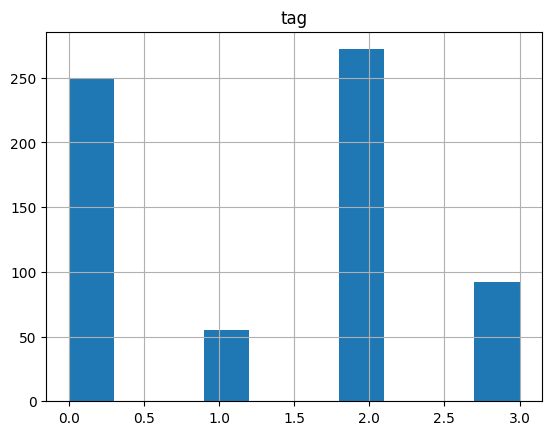

In [216]:
## Data imbalance

pd.DataFrame(y_train,columns=['tag']).hist();


In [ ]:
# %pip install imbalanced-learn==0.8.1

In [218]:
#Data imablance handling with imbalance
from imblearn.over_sampling import RandomOverSampler

In [221]:
sampler = RandomOverSampler(random_state=42,sampling_strategy="all")
X_train_over,y_train_over = sampler.fit_resample(X_train,y_train)

In [223]:
get_class_wts(y_train_over)

{0: 0.003676470588235294, 2: 0.003676470588235294, 3: 0.003676470588235294, 1: 0.003676470588235294}


In [226]:
# Set up baseline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_recall_fscore_support,log_loss

In [227]:
# Initialize model 
model = SGDClassifier(loss="log",penalty='l2',max_iter=1,
    learning_rate="constant", eta0=1e-1, power_t=0.1,
    warm_start=True)

In [240]:
# Train model

max_epochs = 100
val_loss = []
train_loss = []

for epoch in range(max_epochs):
    #pass sample and take opt step
    model.fit(X_train_over,y_train_over)

    #Evaluate
    train_loss.append(log_loss(y_train,model.predict_proba(X_train)))
    val_loss.append(log_loss(y_val,model.predict_proba(X_val)))

    #Log the trainig performance
    if epoch%10==0:
            print("Epoch#  ",epoch, " Train loss: ",train_loss[-1], " Val loss: ",val_loss[-1]);


Epoch#   0  Train loss:  0.1586385384187146  Val loss:  0.4111698010907973
Epoch#   10  Train loss:  0.15643107062440306  Val loss:  0.4098591348245485
Epoch#   20  Train loss:  0.15484388197737017  Val loss:  0.4090573530829869
Epoch#   30  Train loss:  0.15357626077877076  Val loss:  0.40844594901976145
Epoch#   40  Train loss:  0.15233427650930054  Val loss:  0.40767360092981664
Epoch#   50  Train loss:  0.1515336538174153  Val loss:  0.4073628718172375
Epoch#   60  Train loss:  0.1507267761513944  Val loss:  0.4068779030029591
Epoch#   70  Train loss:  0.1500949619001463  Val loss:  0.40663446074868465
Epoch#   80  Train loss:  0.1495894858408001  Val loss:  0.40642147102062004
Epoch#   90  Train loss:  0.14914639036789326  Val loss:  0.4061736029749928


In [247]:
# Evaluate your model
train_metrics = precision_recall_fscore_support(y_train,model.predict(X_train),average='weighted')
val_metrics = precision_recall_fscore_support(y_val,model.predict(X_val),average='weighted')

train_performance = {"precision": train_metrics[0], "recall": train_metrics[1], "f1": train_metrics[2]}
val_performance = {"precision": val_metrics[0], "recall": val_metrics[1], "f1": val_metrics[2]}

print("Validation perfomrance")
print (json.dumps(val_performance, indent=2))


Validation perfomrance
{
  "precision": 0.8711526698433407,
  "recall": 0.8671328671328671,
  "f1": 0.8663777899464677
}


In [252]:
#Inference
text = 'Transfer learning with transformers for text classification.'
pred = model.predict(vectorizer.transform([text]))
le.inverse_transform(pred)

array(['natural-language-processing'], dtype=object)

In [262]:
# Probabilities
y_prob = model.predict_proba(vectorizer.transform([text]))
probs = {}

for i,p in enumerate(y_prob[0]):
    probs[ le.inverse_transform([i])[0] ] = p*100.

print(json.dumps(probs,indent=2))

{
  "computer-vision": 2.812944536473901,
  "mlops": 0.39408866603613346,
  "natural-language-processing": 95.6428917355371,
  "other": 1.150075061952862
}


In [295]:
def custom_predict(probs,inf_thresh,other_idx):
    y_pred = []
    for p in probs:
        cls = np.argmax(p)
        cls_prob = np.max(p)
        if cls_prob >= inf_thresh:
            y_pred.append(cls)
        else:
            y_pred.append(other_idx)
    return y_pred
        

In [296]:
probs = model.predict_proba(X_val)
y_pred = custom_predict(probs,0.7,le.transform(['other'])[0])

# Evaluate your model
val_metrics = precision_recall_fscore_support(y_val,y_pred,average='weighted')

val_performance = {"precision": val_metrics[0], "recall": val_metrics[1], "f1": val_metrics[2]}

print("Validation perfomrance")
print (json.dumps(val_performance, indent=2))


Validation perfomrance
{
  "precision": 0.8920197449609214,
  "recall": 0.7622377622377622,
  "f1": 0.7914368837328445
}


In [297]:
# probs = model.predict_proba(X_val)
y_pred = model.predict(X_val)

# Evaluate your model
val_metrics = precision_recall_fscore_support(y_val,y_pred,average='weighted')

val_performance = {"precision": val_metrics[0], "recall": val_metrics[1], "f1": val_metrics[2]}

print("Validation perfomrance")
print (json.dumps(val_performance, indent=2))


Validation perfomrance
{
  "precision": 0.8711526698433407,
  "recall": 0.8671328671328671,
  "f1": 0.8663777899464677
}


In [298]:
# Test probs
probs = model.predict_proba(X_test)
y_pred = custom_predict(probs,0.7,le.transform(['other'])[0])

# Evaluate your model
test_metrics = precision_recall_fscore_support(y_test,y_pred,average='weighted')

test_performance = {"precision": test_metrics[0], "recall": test_metrics[1], "f1": test_metrics[2]}

print("Validation perfomrance")
print (json.dumps(test_performance, indent=2))


Validation perfomrance
{
  "precision": 0.9081920903954802,
  "recall": 0.7291666666666666,
  "f1": 0.7698581200796392
}
